# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report analyses [No Show Appointments Data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv) from Kaggle.
This dataset contains information collected from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The aim of this research is to determine factors that predict if a patient will or will not show-up for their appointment.

These investigations will provide the answer to the following questions;

 * Which neigborhood has the most patient no-shows?
 * Are male patients more likely to show up to their appointments than female patients?
 * Does receiving the reminder SMS improve the chances of patients showing up for their appointments?
 
 

In [1]:
# import all required modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

>  In this section,l loaded in the data, checked for cleanliness, and then cleaned my dataset for analysis.

### General Properties

>  A number of characteristics about the patients are included in each row. for example;  
● 'ScheduledDay' tells us on what day the patient set up their appointment.
● 'AppointmentDay' tells us on what day the patient is to show up for their appointment.
● 'Neighborhood' indicates the location of the hospital.  
● 'Diabetes' tells us whether the patient had diabetes or not. 

In [2]:
df_noshow = pd.read_csv('noshowappointments.csv')
df_noshow.head()

# Load the data and print the first 5 lines.


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df_noshow.shape
#check the number of rows and columns

(110527, 14)

In [4]:
df_noshow.info()
# Use the .info() method to inspect the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Check for duplicate data

df_noshow.duplicated().sum()

# this check yieled no duplicate data

0

In [6]:
# Check for any missing data

df_noshow.isnull().any()

#this check yielded no missing data

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
df_noshow.isnull().values.any()
# Another method to check for missing data

False

In [8]:
df_noshow.describe()
# show basic statistics data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning

While inspecting the data, the following issues with the data were noticed;
 * the column names,"hipertension and handcap" are misspelled
 * the columns "AppointmentDay and ScheduledDay" are in string format instead of datetime format.
 * A lot of the columns in this dataset will not be required for my analysis.

The data cleaning processes at this stage will include changing the names of the columns spelt wrongly and changing the datatype of the columns to the correct format. Also, slice the dataset to extract only columns irrelevant to analysis. 


In [9]:
# Correct the column names

df_noshow=df_noshow.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_Show'})

In [10]:
# Change the data type of "AppointmentDay" from string to datetimeformat

df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])
df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow['ScheduledDay'])
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_Show       

> The dataset is sliced to remove irrelevant columns. resources on data slicing can be found [here](https://stackoverflow.com/questions/40698043/slicing-multiple-ranges-of-columns-in-pandas-by-list-of-names)

In [11]:
df_ns = df_noshow.iloc[:, [2, 5, 6, 12, 13]]

df_ns.head()


,Gender,Age,Neighbourhood,SMS_received,No_Show
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


In [12]:
df_ns.info()
#inspect the data to ensure the changes are reflected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   SMS_received   110527 non-null  int64 
 4   No_Show        110527 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


In [13]:
df_ns.describe()

,Age,SMS_received
count,110527.000000,110527.000000
mean,37.088874,0.321026
std,23.110205,0.466873
min,-1.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,1.000000
max,115.000000,1.000000


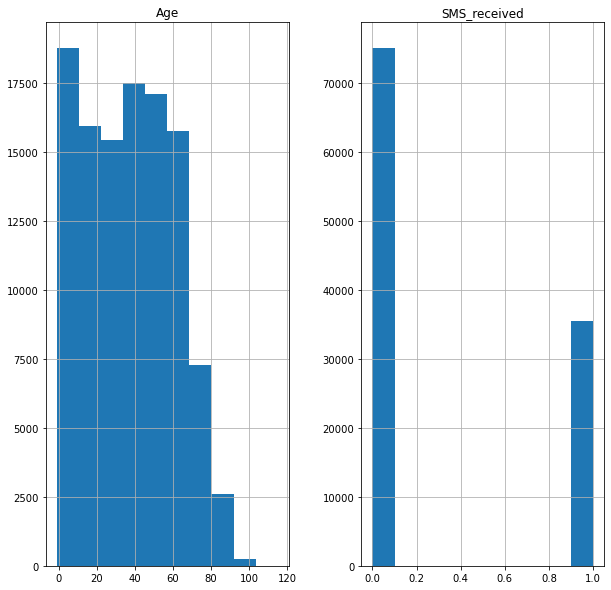

In [14]:
# plot a histogram of the dataset

df_ns.hist(figsize= (10,10));


### QUESTION 1: Which neighborhood has the most patient no shows?

In [15]:
no_noshow = df_ns.query('No_Show == "No" ')
yes_noshow = df_ns.query('No_Show == "Yes" ')


In [16]:
Neighb = no_noshow.Neighbourhood.value_counts()
Neighb.head(10)

JARDIM CAMBURI     6252
MARIA ORTIZ        4586
RESISTÊNCIA        3525
JARDIM DA PENHA    3246
SANTA MARTHA       2635
CENTRO             2631
ITARARÉ            2591
TABUAZEIRO         2559
SANTO ANTÔNIO      2262
BONFIM             2223
Name: Neighbourhood, dtype: int64

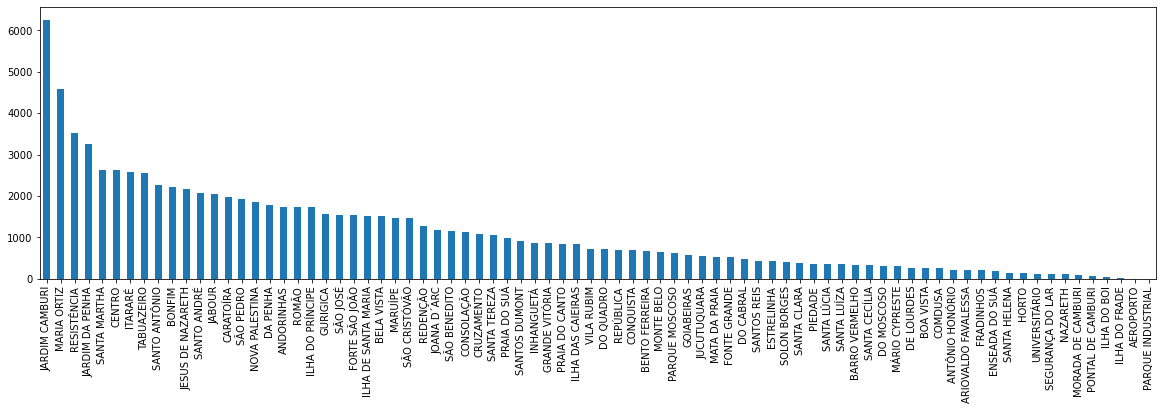

In [17]:
Neighb = no_noshow.Neighbourhood.value_counts().plot(kind = 'bar', figsize= (20,5))
# plot a barchart to show the number of patients who showed up for their appointments by their neighbourhood

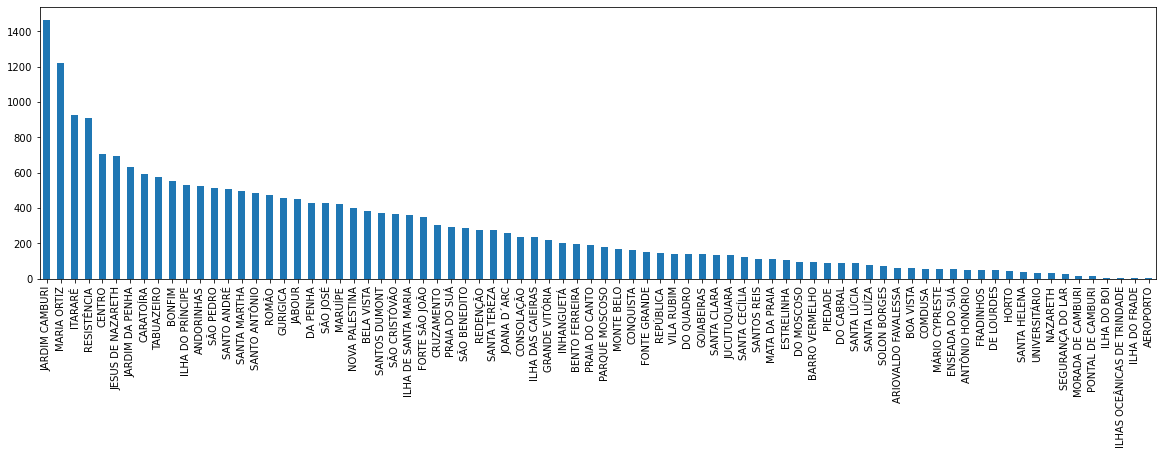

In [18]:
Neighb = yes_noshow.Neighbourhood.value_counts().plot(kind = 'bar', figsize= (20,5))
# plot a barchart to show the number of patients who didn't showed up for their appointments by their neighbourhood

According to these Analysis, patients from JARDIM CAMBURI neighbourhood are more likey to show up for their appointments, while Patients from PARQUE INDUSTRIAL are least likely to show up for their appointments. Although data limitations make it impossible to discern the reason why.

### QUESTION 2: Which Gender is more likely to show up for their appointment?

In [ ]:
sex = no_noshow.Gender.value_counts()
sex.head()

In [ ]:
sex = no_noshow.Gender.value_counts().plot(kind="bar")

According to the analysis and the barchart, female patients are more likely to show up for their appointments than their male counterparts.




### QUESTION 3: Does receiving the reminder SMS improve the chances of patients showing up for their appointments?

In [ ]:
# Identify the unique values of the SMS_received column
df_ns['SMS_received'].unique()


# 0 represents those who did not received the SMS while 1 represents those who received the SMS

In [ ]:
smsreceived = df_ns.query('SMS_received == 1')
nosms = df_ns.query('SMS_received == 0')

In [ ]:
# To check the number of people who receieved the sms
smsreceived.shape

In [ ]:
# To check the number of people who didnt receive the sms
nosms.shape

In [ ]:
# To check the number of people who received the sms and showed up
smsreceived.No_Show.value_counts()

According to the above analysis, out of 35,482 patients who received the SMS, 25,698 of them showed up for their appointment while 9784 patients didnt show up despite receiving the SMS.


Below is a barchart visualization of the analysis.

In [ ]:
smsreceived.No_Show.value_counts().plot(kind='bar', figsize = (6,6));

In [ ]:
# Check for the number of patients who didnt received the SMS but showed up and those that didnt show up
nosms.No_Show.value_counts()

According to the above analysis, there were a total of 75045 patients who did not receicve the SMS. 62510 of them showed up for their appoinment, despite not receiving the SMS. A total of 12,535 patients who didnt received the SMS, did not show up for appointments. It is unusual that more patients who didnt receive the SMS showed up for their appointments than patients who actually received the SMS. Further investigations is required to determine why.

In [ ]:
nosms.No_Show.value_counts().plot(kind = 'bar', figsize = (6,6));

In [ ]:
# find the percentage of shows/noshows among patients who received the sms
Plot = smsreceived.No_Show.value_counts()
fig = plt.figure(figsize =(6,6))
ax = plt.subplot()

Plot.plot(kind = 'pie', ax=ax, autopct= '%1.1f%%', startangle = 200, fontsize=17)

In [ ]:
# Find the percentage of shows/noshows among patients didnt who received the sms
Plot = nosms.No_Show.value_counts()
fig = plt.figure(figsize =(6,6))
ax = plt.subplot()

Plot.plot(kind = 'pie', ax=ax, autopct= '%1.1f%%', startangle = 200, fontsize=17)

<p> As shown in the charts, 72.4% of people that received the SMS went for their appointment while 83.3% of people that didn't receive SMS went for their appointment. In conclusion sending SMS doesn't guarantee that patients will show up for their appointments.

<a id='conclusions'></a>
## Conclusions

> The neighbourhood where a patient is coming from determines to an extent if they will attend their appointment. Due to data limitations, further investigations are needed to determine why patients from certain neighbourhoods are more likely to attend their appointments. The analysis although limited shows that women are more likely to attend their appointments than men. lastly, It is unusual that more patients who didnt receive the SMS showed up for their appointments than patients who actually received the SMS. Further investigations is required to determine why. 
In conclusion, a patient's neighbourhood, gender will influence if they will attend their appointments but SMS reception does not guarantee a patient will attend their appointment.